In [2]:
import pandas as pd
from ydata_profiling import ProfileReport 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score


In [3]:

data = pd.read_csv("C:\\Users\merah\Documents\GitHub\CIND820\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv")
data = data.groupby('patient_nbr').head(1)

# Verify the result
print(f"Number of unique patients: {data['patient_nbr'].nunique()}")

print(f"Shape of dataset after keeping first encounters: {data.shape}")

Number of unique patients: 71518
Shape of dataset after keeping first encounters: (71518, 50)


In [4]:
data = pd.read_csv("C:\\Users\merah\Documents\GitHub\CIND820\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv")
data = data.groupby('patient_nbr').head(1)

# Verify the result
print(f"Number of unique patients: {data['patient_nbr'].nunique()}")

print(f"Shape of dataset after keeping first encounters: {data.shape}")

Number of unique patients: 71518
Shape of dataset after keeping first encounters: (71518, 50)


In [5]:
# Group diagnosis codes into categories
def group_diagnosis(icd_code):
    try:
        code = float(icd_code)  # Convert to float
    except ValueError:  # Handle non-numeric values
        return "Unknown"

    if 1 <= code <= 139:
        return "Infectious and Parasitic"
    elif 140 <= code <= 239:
        return "Neoplasms"
    elif 240 <= code <= 279:
        return "Endocrine, Nutritional, and Metabolic"
    elif 280 <= code <= 289:
        return "Blood Diseases"
    elif 390 <= code <= 459:
        return "Circulatory System"
    elif 460 <= code <= 519:
        return "Respiratory System"
    elif 520 <= code <= 579:
        return 'Digestive System'
    elif 580 <= code <= 629:
        return 'Genitourinary System'
    elif 630 <= code <= 679:
        return 'Pregnancy Complications'
    elif 680 <= code <= 709:
        return 'Skin Diseases'
    elif 710 <= code <= 739:
        return 'Musculoskeletal Disorders'
    elif 740 <= code <= 759:
        return 'Congenital Anomalies'
    elif 760 <= code <= 779:
        return 'Perinatal Conditions'
    elif 780 <= code <= 799:
        return 'Symptoms and Ill-Defined Conditions'
    elif 800 <= code <= 999:
        return 'Injury and Poisoning'
    else:
        return "Other"

# Apply grouping to the diagnosis columns
for col in ['diag_1', 'diag_2', 'diag_3']:
    data[col] = data[col].apply(group_diagnosis)

C:\Users\merah\AppData\Local\Temp\ipykernel_27424\2112253938.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.replace('?', pd.NA, inplace=True)
C:\Users\merah\AppData\Local\Temp\ipykernel_27424\2112253938.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.dropna(inplace=True)
C:\Users\merah\AppData\Local\Temp\ipykernel_27424\2112253938.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

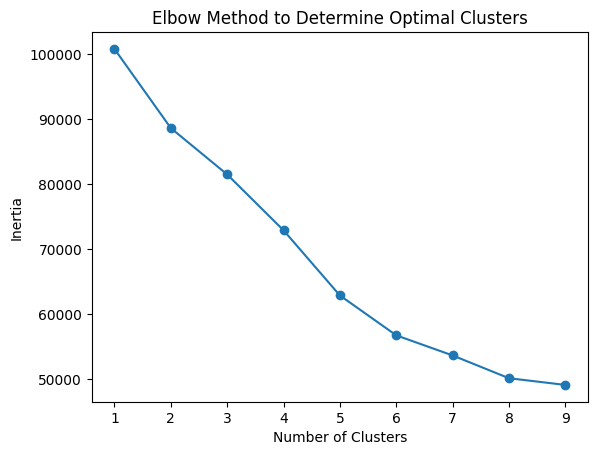

In [6]:
# Step 1: Data Cleaning
data['readmitted'] = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Select relevant features including all diagnoses
features = ['race', 'gender', 'age', 'time_in_hospital', 
            'discharge_disposition_id', 
            'diag_1', 'A1Cresult', 'change','readmitted']
#HbA1c levels, primary diagnoses, types of medications, discharge disposition
data_subset = data[features]

# Handle missing values (replace '?' with NaN, then drop or impute)
data_subset.replace('?', pd.NA, inplace=True)
data_subset.dropna(inplace=True)

# Encode categorical features using Label Encoding
label_encoders = {}
for column in ['race', 'gender', 'age', 'diag_1', 'A1Cresult', 'readmitted', 'discharge_disposition_id', 'change']:
    le = LabelEncoder()
    data_subset[column] = le.fit_transform(data_subset[column])
    label_encoders[column] = le

#Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_subset.drop('time_in_hospital', axis=1))

# K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method (optional)
inertia = []
range_n_clusters = range(1, 10)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
import matplotlib.pyplot as plt
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()




# number of cluster : 8

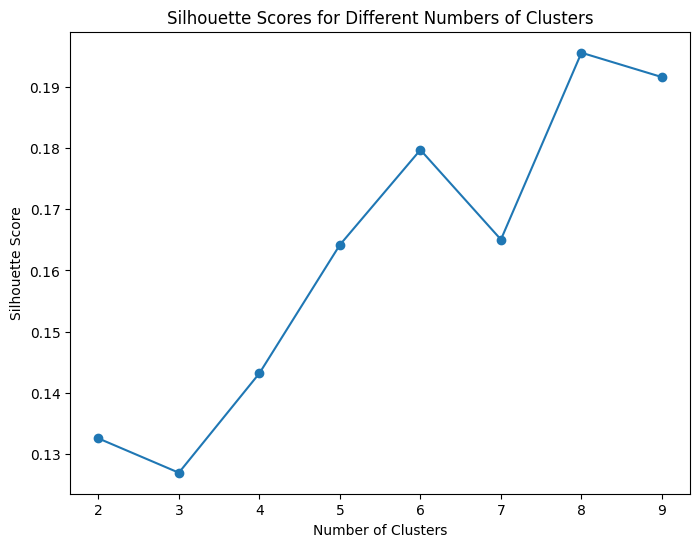

The optimal number of clusters based on Silhouette Score is: 8


In [7]:
from sklearn.metrics import silhouette_score

#Calculate Silhouette_score for different numbers of clusters
silhouette_scores = []
range_n_clusters = range(2, 10)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

# Output the optimal number of clusters
optimal_clusters_sil = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on Silhouette Score is: {optimal_clusters_sil}")

C:\Users\merah\AppData\Local\Temp\ipykernel_27424\3831797217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Cluster'] = cluster_labels


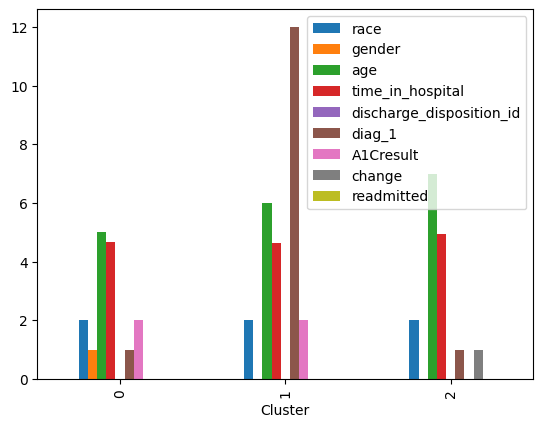

,race,gender,age,time_in_hospital,discharge_disposition_id,diag_1,A1Cresult,change,readmitted
Cluster,,,,,,,,,
0,2,1,5,4.664381,0,1,2,0,0
1,2,0,6,4.622522,0,12,2,0,0
2,2,0,7,4.938206,0,1,0,1,0


In [14]:

# Perform K-Means clustering with 8 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
data_subset['Cluster'] = cluster_labels

# Identify dominant features in each cluster

# Average values of numerical features by cluster
cluster_means = data_subset.groupby('Cluster').mean()

# Dominant categorical values for each cluster
dominant_features = {}
for column in ['race', 'gender', 'age', 'diag_1', 'A1Cresult', 'readmitted', 'discharge_disposition_id', 'change']:
    dominant_features[column] = data_subset.groupby('Cluster')[column].agg(lambda x: x.value_counts().idxmax())

# Combine results into a summary
cluster_summary = cluster_means.copy()
for column, values in dominant_features.items():
    cluster_summary[column] = values

# Display the cluster summaries
import matplotlib.pyplot as plt
cluster_summary.plot(kind='bar')
plt.show()

cluster_summary


C:\Users\merah\AppData\Local\Temp\ipykernel_27424\304882285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Cluster'] = cluster_labels


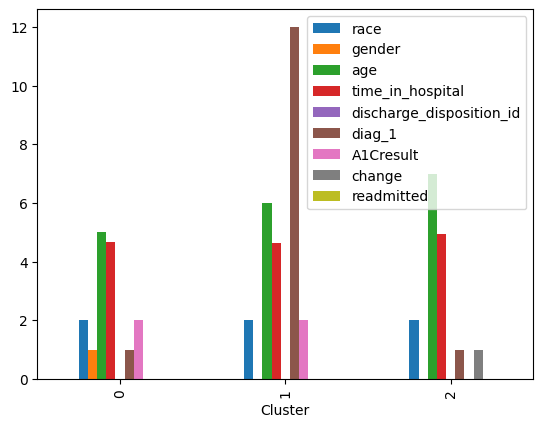

,race,gender,age,time_in_hospital,discharge_disposition_id,diag_1,A1Cresult,change,readmitted
Cluster,,,,,,,,,
0,2,1,5,4.664381,0,1,2,0,0
1,2,0,6,4.622522,0,12,2,0,0
2,2,0,7,4.938206,0,1,0,1,0


In [15]:

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
data_subset['Cluster'] = cluster_labels

# Identify dominant features in each cluster

# Average values of numerical features by cluster
cluster_means = data_subset.groupby('Cluster').mean()

# Dominant categorical values for each cluster
dominant_features = {}
for column in ['race', 'gender', 'age', 'diag_1', 'A1Cresult', 'readmitted', 'discharge_disposition_id', 'change']:
    dominant_features[column] = data_subset.groupby('Cluster')[column].agg(lambda x: x.value_counts().idxmax())

# Combine results into a summary
cluster_summary = cluster_means.copy()
for column, values in dominant_features.items():
    cluster_summary[column] = values

# Display the cluster summaries
import matplotlib.pyplot as plt
cluster_summary.plot(kind='bar')
plt.show()

cluster_summary






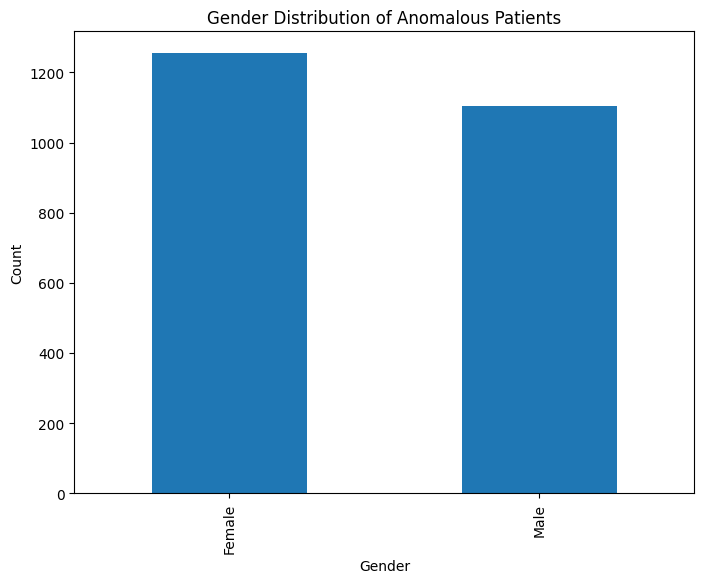

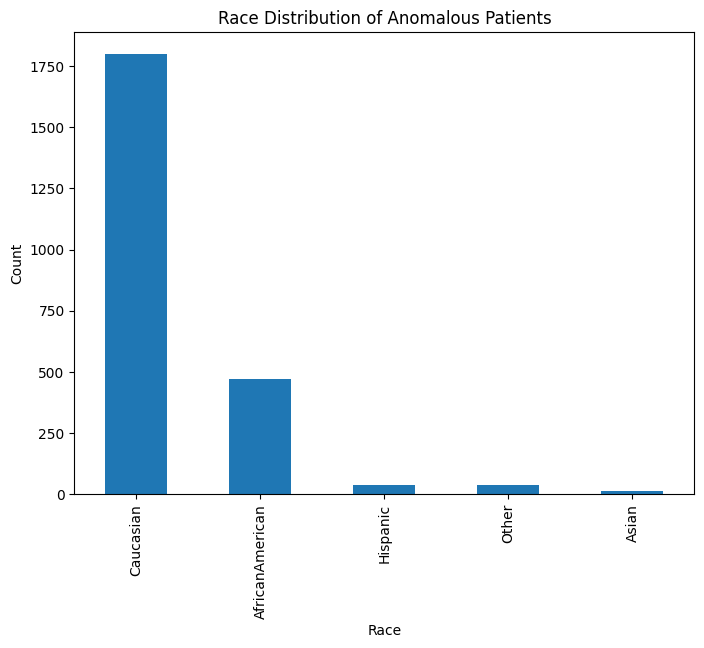

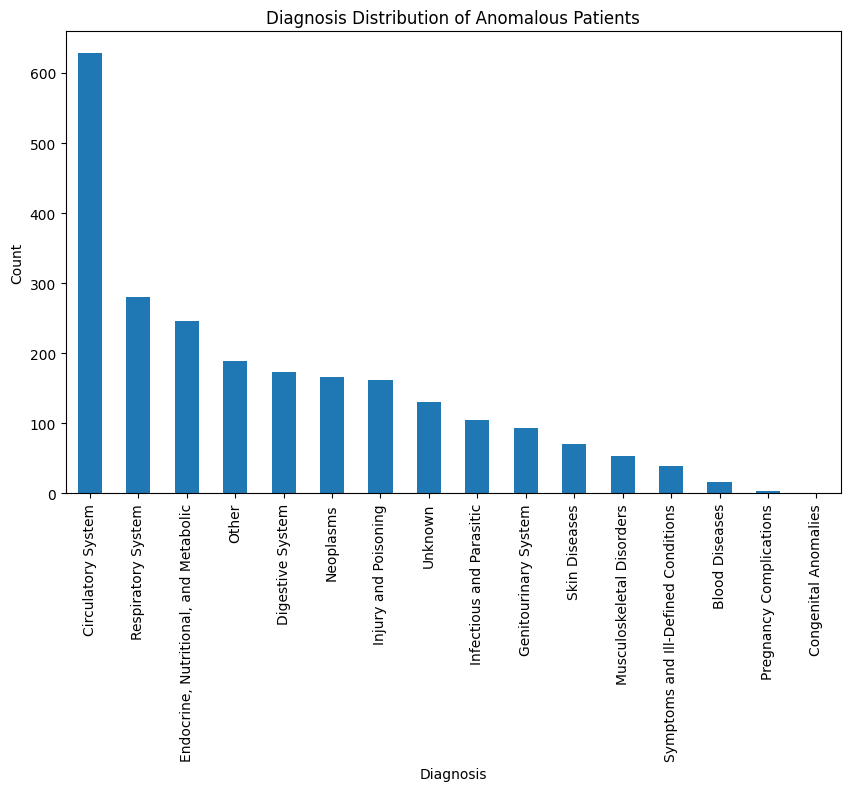

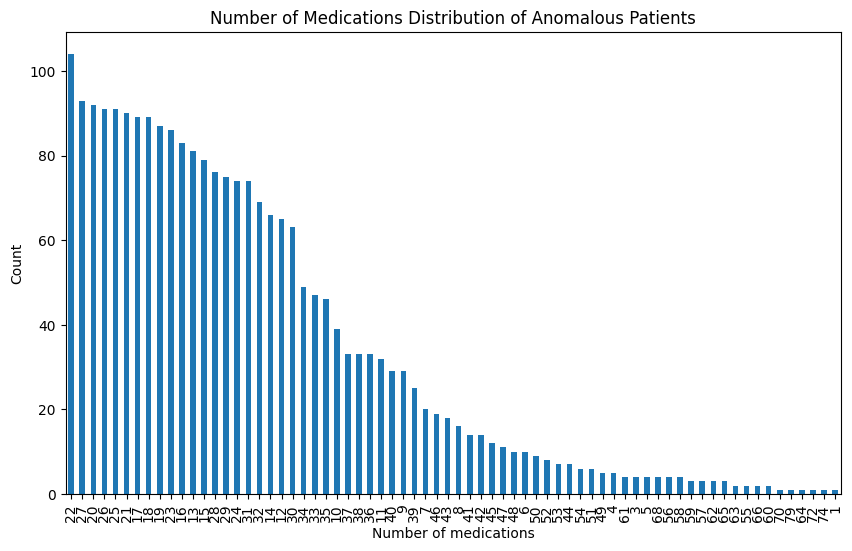

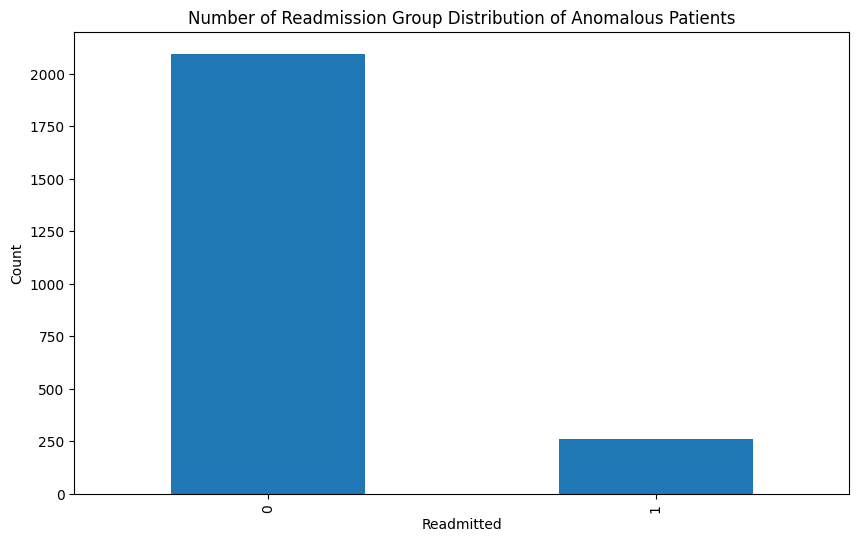

In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Preprocess data for anomaly detection
hospital_stay_data = data[['time_in_hospital', 'gender', 'race', 'diag_1','num_medications','readmitted']].copy()
hospital_stay_data = hospital_stay_data.replace('?', np.nan).dropna()
hospital_stay_data['time_in_hospital'] = hospital_stay_data['time_in_hospital'].astype(float)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
hospital_stay_data['anomaly'] = iso_forest.fit_predict(hospital_stay_data[['time_in_hospital']])
hospital_stay_data['anomaly'] = hospital_stay_data['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Separate anomalous and normal data
anomalous_data = hospital_stay_data[hospital_stay_data['anomaly'] == 1]
normal_data = hospital_stay_data[hospital_stay_data['anomaly'] == 0]

# Visualization for gender distribution
plt.figure(figsize=(8, 6))
gender_counts = anomalous_data['gender'].value_counts()
gender_counts.plot(kind='bar', title="Gender Distribution of Anomalous Patients")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualization for race distribution
plt.figure(figsize=(8, 6))
race_counts = anomalous_data['race'].value_counts()
race_counts.plot(kind='bar', title="Race Distribution of Anomalous Patients")
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Visualization for diagnosis distribution
plt.figure(figsize=(10, 6))
diag_counts = anomalous_data['diag_1'].value_counts()
diag_counts.plot(kind='bar', title="Diagnosis Distribution of Anomalous Patients")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


# Visualization for number of medications distribution
plt.figure(figsize=(10, 6))
diag_counts = anomalous_data['num_medications'].value_counts()
diag_counts.plot(kind='bar', title="Number of Medications Distribution of Anomalous Patients")
plt.xlabel('Number of medications')
plt.ylabel('Count')
plt.show()

# Visualization for number of medications distribution
plt.figure(figsize=(10, 6))
diag_counts = anomalous_data['readmitted'].value_counts()
diag_counts.plot(kind='bar', title="Number of Readmission Group Distribution of Anomalous Patients")
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()